In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv

In [2]:
# Load data from netlogo's behaviorspace "spreadsheet" output
def loadBehaviorspace(filename):
    lines = []
    with open(filename, 'rb') as csvfile:
         reader = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in reader:
             lines.append(row)

    metadata = lines[0:5]
    
    _data = lines[6:]
    _data = np.array(lines[6:], dtype=object).T
    for i in range(1, len(_data)):
        for j in range(1, len(_data[i])):
            try:
                _data[i][j] = float(_data[i][j])
            except:
                continue
    data = {}
    for col in _data:
        data[col[0]] = np.array(col[1:], dtype=float)
            
    return (metadata, data)

In [13]:
#metadata,data = loadBehaviorspace("./behaviorspace_data/tau_turn-taker.csv")
metadata,data = loadBehaviorspace("./behaviorspace_data/tau_memory-agent_4_pools_variance.csv")


## Final total wealth, across tau


intercept = 3967.0
slope =     1805.0


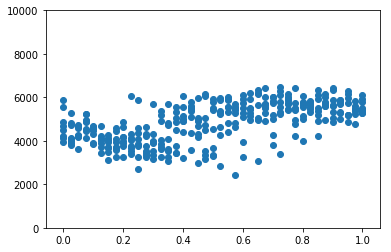

p = 6.483372793601293e-32
r = 0.588
stderr = 137.4


In [14]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

#final_mutation_magnitude = np.extract(final_step_mask, data['mutation-magnitude'])

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(final_tau, final_total_wealth)

print ""
print "intercept =", round(intercept)
print "slope =    ", round(slope)

#plt.plot(final_tau, intercept + slope*final_tau, 'r', label='fitted line')
plt.scatter(final_tau, final_total_wealth)
plt.ylim(0, 10000)
plt.show()

print "p =", p_value
print "r =", round(r_value, 3)
print "stderr =",round(std_err, 1)

...

## Final wealth distribution, across tau
Per agent type

In [341]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_wealth_0 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 0 ]'])
final_wealth_1 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 1 ]'])
#final_wealth_2 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 2 ]'])
#final_wealth_3 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 3 ]'])

plt.scatter(final_tau, final_wealth_0, color='blue')
plt.scatter(final_tau, final_wealth_1, color='red')
#plt.scatter(final_tau, final_wealth_2, color='red')
#plt.scatter(final_tau, final_wealth_3, color='green')
plt.show()

KeyError: 'sum [wealth] of turtles with [ strategy = 0 ]'

## Pool breakdowns on final step

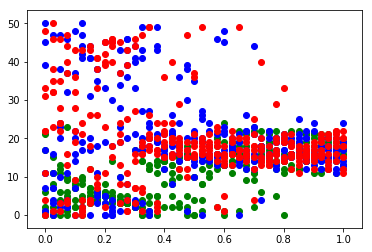

In [15]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_pool_count_0 = np.extract(final_step_mask, data['get-for-pool recent-agent-history 0'])
final_pool_count_1 = np.extract(final_step_mask, data['get-for-pool recent-agent-history 1'])
final_pool_count_2 = np.extract(final_step_mask, data['get-for-pool recent-agent-history 2'])



plt.scatter(final_tau, final_pool_count_0, color='green')
plt.scatter(final_tau, final_pool_count_1, color='blue')
plt.scatter(final_tau, final_pool_count_2, color='red')
plt.show()

## Wealth vs variance


intercept = 5442.0
slope =     -7.0


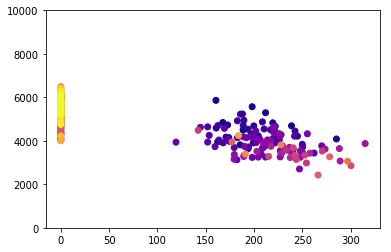

p = 3.011151017067981e-78
r = -0.812
stderr = 0.3


In [19]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_variance = np.extract(final_step_mask, data['agent-variance'])
final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

#final_mutation_magnitude = np.extract(final_step_mask, data['mutation-magnitude'])

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(final_variance, final_total_wealth)

print ""
print "intercept =", round(intercept)
print "slope =    ", round(slope)

#plt.plot(final_tau, intercept + slope*final_tau, 'r', label='fitted line')
plt.scatter(final_variance, final_total_wealth, color=plt.cm.plasma(plt.Normalize()(final_tau)))
plt.ylim(0, 10000)
plt.show()

print "p =", p_value
print "r =", round(r_value, 3)
print "stderr =",round(std_err, 1)